In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("Sales_new.csv")
df=df.dropna()
df

,id,YEAR,PERD,Sale
0,32974,2020,3,29.11
1,358889,2021,8,1529.39
2,5497036,2021,6,130.91
3,5825239,2020,9,6934.36
4,402448,2021,6,1603.12
...,...,...,...,...
9995,6226271,2020,11,3060.90
9996,6503733,2020,6,204.84
9997,52010,2020,2,25.22
9998,40596,2020,11,260.99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10000 non-null  int64  
 1   YEAR    10000 non-null  int64  
 2   PERD    10000 non-null  int64  
 3   Sale    10000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 390.6 KB


In [3]:
df.rename(columns = {'PERD':'Month'}, inplace = True)
df

,id,YEAR,Month,Sale
0,32974,2020,3,29.11
1,358889,2021,8,1529.39
2,5497036,2021,6,130.91
3,5825239,2020,9,6934.36
4,402448,2021,6,1603.12
...,...,...,...,...
9995,6226271,2020,11,3060.90
9996,6503733,2020,6,204.84
9997,52010,2020,2,25.22
9998,40596,2020,11,260.99


In [4]:
df.rename(columns = {'YEAR':'Year'}, inplace = True)
df

,id,Year,Month,Sale
0,32974,2020,3,29.11
1,358889,2021,8,1529.39
2,5497036,2021,6,130.91
3,5825239,2020,9,6934.36
4,402448,2021,6,1603.12
...,...,...,...,...
9995,6226271,2020,11,3060.90
9996,6503733,2020,6,204.84
9997,52010,2020,2,25.22
9998,40596,2020,11,260.99


In [5]:
df['Date'] = pd.to_datetime(df.assign(Day=1).loc[:, ['Year','Month','Day']])
df

,id,Year,Month,Sale,Date
0,32974,2020,3,29.11,2020-03-01
1,358889,2021,8,1529.39,2021-08-01
2,5497036,2021,6,130.91,2021-06-01
3,5825239,2020,9,6934.36,2020-09-01
4,402448,2021,6,1603.12,2021-06-01
...,...,...,...,...,...
9995,6226271,2020,11,3060.90,2020-11-01
9996,6503733,2020,6,204.84,2020-06-01
9997,52010,2020,2,25.22,2020-02-01
9998,40596,2020,11,260.99,2020-11-01


In [6]:
df.drop(['Year','Month','id'],axis=1,inplace=True)
df

,Sale,Date
0,29.11,2020-03-01
1,1529.39,2021-08-01
2,130.91,2021-06-01
3,6934.36,2020-09-01
4,1603.12,2021-06-01
...,...,...
9995,3060.90,2020-11-01
9996,204.84,2020-06-01
9997,25.22,2020-02-01
9998,260.99,2020-11-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Sale    10000 non-null  float64       
 1   Date    10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 234.4 KB


In [8]:
df['Date'] =pd.to_datetime(df.Date)
df.sort_values('Date')

,Sale,Date
1597,144.89,2020-01-01
5522,1207.80,2020-01-01
2109,2618.65,2020-01-01
5506,529.62,2020-01-01
5503,-457.10,2020-01-01
...,...,...
7829,0.00,2021-10-01
3511,4948.65,2021-10-01
9276,709.99,2021-10-01
9655,2019.15,2021-10-01


In [9]:
df=df.sort_values('Date')
df

,Sale,Date
1597,144.89,2020-01-01
5522,1207.80,2020-01-01
2109,2618.65,2020-01-01
5506,529.62,2020-01-01
5503,-457.10,2020-01-01
...,...,...
7829,0.00,2021-10-01
3511,4948.65,2021-10-01
9276,709.99,2021-10-01
9655,2019.15,2021-10-01


In [10]:
df.set_index('Date',inplace=True)
df

,Sale
Date,
2020-01-01,144.89
2020-01-01,1207.80
2020-01-01,2618.65
2020-01-01,529.62
2020-01-01,-457.10
...,...
2021-10-01,0.00
2021-10-01,4948.65
2021-10-01,709.99


In [56]:
df=df.groupby(['Date']).sum('Sale')
df

,Sale
Date,
2020-01-01,615078.04
2020-02-01,809332.43
2020-03-01,714310.71
2020-06-01,687222.94
2020-07-01,601142.27
2020-08-01,543033.72
2020-09-01,728833.64
2020-10-01,558524.51
2020-11-01,657079.01


In [59]:
df1 = df.copy()
df1['Sale']

Date
2020-01-01    615078.04
2020-02-01    809332.43
2020-03-01    714310.71
2020-06-01    687222.94
2020-07-01    601142.27
2020-08-01    543033.72
2020-09-01    728833.64
2020-10-01    558524.51
2020-11-01    657079.01
2020-12-01    755302.93
2021-01-01    685074.84
2021-02-01    586841.19
2021-03-01    740325.66
2021-04-01    576712.24
2021-05-01    813125.75
2021-06-01    849845.52
2021-07-01    616459.22
2021-08-01    493776.04
2021-09-01    688286.92
2021-10-01    475149.94
Name: Sale, dtype: float64

In [12]:
import matplotlib.pyplot as plt
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

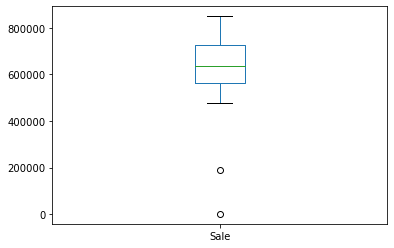

In [13]:
plot_boxplot(df,'Sale')

In [14]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [15]:
index_list = []
for ft in ['Sale']:
    index_list.extend(outliers(df,ft))
    

In [16]:
index_list

[Timestamp('2020-04-01 00:00:00'), Timestamp('2020-05-01 00:00:00')]

In [17]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [18]:
df=df_cleaned = remove(df,index_list)

In [19]:
df.shape

(20, 1)

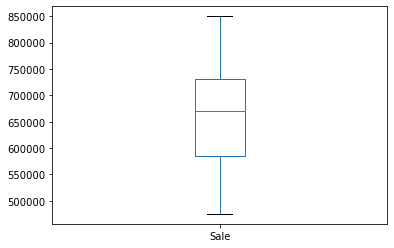

In [20]:
plot_boxplot(df,'Sale')

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

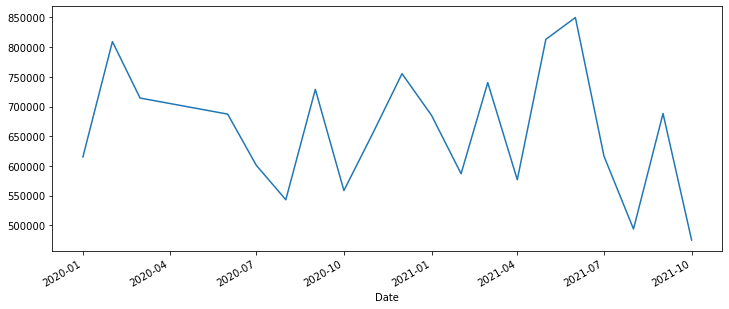

In [22]:
df['Sale'].plot(figsize=(12,5))

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
test_result=adfuller(df['Sale'])

In [25]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sale):
    result=adfuller(sale)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [26]:
adfuller_test(df['Sale'])

ADF Test Statistic : -0.3090040110517465
p-value : 0.9242193785964147
#Lags Used : 8
Number of Observations Used : 11
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


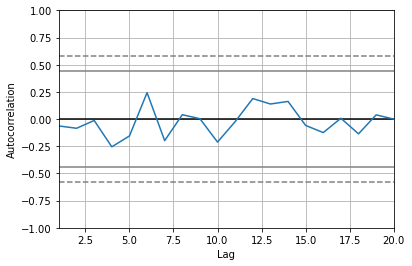

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sale'])
plt.show()

In [28]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [29]:
stepwise_fit = auto_arima(df['Sale'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=528.478, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=522.500, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=524.425, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=524.636, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=595.226, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=526.476, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.089 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                        SARIMAX   Log Likelihood                -259.250
Date:                Mon, 08 Nov 2021   AIC                            522.500
Time:                        16:15:52   BIC                            524.491
Sample:                             0   HQIC                           522.888
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.598e+05   2.31e+04     28.593      0.000    6.15e+05    7.05e+05
sigma2      1.063e+10   4.47e+09      2.379      0.017    1.87e+09    1.94e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.76   Prob(JB):                         0.73
Heteroskedasticity (H):               2.62   Skew:                             0.04
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
print(df.shape)

(20, 1)


In [32]:
train=df.iloc[:-2]
test=df.iloc[-2:-1]

In [33]:
print(train.shape,test.shape)

(18, 1) (1, 1)


In [34]:
model=ARIMA(train['Sale'],order=(0,0,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Sale   No. Observations:                   18
Model:                     ARMA(0, 0)   Log Likelihood                -232.591
Method:                           css   S.D. of innovations          98989.872
Date:                Mon, 08 Nov 2021   AIC                            469.182
Time:                        16:15:53   BIC                            470.962
Sample:                             0   HQIC                           469.427
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.684e+05   2.33e+04     28.649      0.000    6.23e+05    7.14e+05
==============================================================================
"""

In [35]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2021-09-01    668445.592222
dtype: float64


In [36]:
test['Sale'].mean()

688286.9199999995

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Sale']))
print(rmse)

19841.32777777745


In [61]:
excel = pd.DataFrame(df1,   columns = ['Sales', 'Prediction'])
excel['Sales'] = df1['Sale']
excel

,Sales,Prediction
Date,,
2020-01-01,615078.04,NaN
2020-02-01,809332.43,NaN
2020-03-01,714310.71,NaN
2020-06-01,687222.94,NaN
2020-07-01,601142.27,NaN
2020-08-01,543033.72,NaN
2020-09-01,728833.64,NaN
2020-10-01,558524.51,NaN
2020-11-01,657079.01,NaN


In [69]:
excel['Prediction'] =  pred
excel

,Sales,Prediction
Date,,
2020-01-01,615078.04,NaN
2020-02-01,809332.43,NaN
2020-03-01,714310.71,NaN
2020-06-01,687222.94,NaN
2020-07-01,601142.27,NaN
2020-08-01,543033.72,NaN
2020-09-01,728833.64,NaN
2020-10-01,558524.51,NaN
2020-11-01,657079.01,NaN


In [70]:
excel ['Prediction'] = excel ['Prediction'].fillna (0)
excel

,Sales,Prediction
Date,,
2020-01-01,615078.04,0.000000
2020-02-01,809332.43,0.000000
2020-03-01,714310.71,0.000000
2020-06-01,687222.94,0.000000
2020-07-01,601142.27,0.000000
2020-08-01,543033.72,0.000000
2020-09-01,728833.64,0.000000
2020-10-01,558524.51,0.000000
2020-11-01,657079.01,0.000000


In [72]:
excel.to_csv('after_pred.csv',index=True)